### 简单的示例程序

In [32]:
# 导入tensorflow
import tensorflow as tf
# 定义常量
hello = tf.constant('Hello, TensorFlow!')
# 定义session
sess = tf.Session()
# 运行
print(sess.run(hello))

b'Hello, TensorFlow!'


### 计算图

In [33]:
# 定义两个常量节点
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly

In [34]:
print(node1)
print(node2)

Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("Const_2:0", shape=(), dtype=float32)


In [12]:
sess = tf.Session()
sess.run(node1)

3.0

In [13]:
sess.run(node2)

4.0

### session

In [8]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


In [9]:
# 定义一个加法操作
node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add_1:0", shape=(), dtype=float32)
sess.run(node3): 7.0


### placeholder

In [17]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)
c = tf.placeholder(tf.float32)
d = c * adder_node

In [20]:
print(sess.run(d, {a: 3, b: 4.5, c:1.2}))

9.0


In [16]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b: 4.5}))

22.5


### 练习 1:

建立一个计算图，计算$(a + b) + (a \times b)$

In [1]:
import tensorflow as tf

/Users/liuyanfang/anaconda3/envs/tensorflow1.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
c=(a+b)+(a*b)
sess = tf.Session()
print(sess.run(c,{a:2,b:4}))

14.0


In [2]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = (a + b) + (a * b)

In [3]:
sess = tf.Session()
sess.run(c, {a:1.2, b:3.2})

8.24

In [5]:
import tensorflow as tf
a = tf.placeholder(tf.float32, shape=())
b = tf.placeholder(tf.float32, shape=())
c = (a + b) + (a * b)

In [6]:
sess = tf.Session()
sess.run(c, {a:1.3, b:3.2})

8.66

### Variable

In [7]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b

变量使用之前必须要进行初始化

In [8]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

[ 0. -1. -2. -3.]


定义loss

In [12]:
# y用于输入真实值
y = tf.placeholder(tf.float32)
# 计算预测值与真实值差的平方
squared_deltas = tf.square(linear_model - y)
# 计算均值
loss = tf.reduce_mean(squared_deltas)
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

6.165


In [15]:
# 给变量赋值
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

0.0


使用梯度下降

In [16]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [17]:
sess.run(init) # reset values to incorrect defaults.
for i in range(2000):
    sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
print(sess.run([W, b]))

[array([-0.9986794], dtype=float32), array([0.9961174], dtype=float32)]


### 一般程序结构

In [21]:
# 创建一个graph对象
graph = tf.Graph()

In [22]:
# 将graph设置为默认的图
with graph.as_default():
    a = tf.placeholder(tf.float32)
    b = tf.placeholder(tf.float32)
    c = a * b
    d = tf.placeholder(tf.float32)
    ans = d * c

Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.Session object at 0x118dde898>>
Traceback (most recent call last):
  File "/Users/liuyanfang/anaconda3/envs/tensorflow1.4/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 694, in __del__
    if self._session is not None:
AttributeError: 'Session' object has no attribute '_session'


In [25]:
# 创建session运行计算图
with tf.Session(graph=graph) as sess:  # 需指明session对应的计算图
    print(sess.run(c, {a:1.2, b:2.8}))
    print(sess.run(ans, {a:1.2, b:2.8, d:3.2}))

3.3600001
10.752001


### 练习 2：
将以上的例子（linear_model）部分改写为一般结构。

In [35]:
import tensorflow as tf
import numpy as np

In [2]:
graph = tf.Graph()

In [4]:
with graph.as_default():
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    W = tf.Variable([0.3], dtype=tf.float32)
    b = tf.Variable([0.1], dtype=tf.float32)
    pred = W * x + b
    loss = tf.reduce_mean(tf.square(y - pred))
    opt = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [13]:
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(2000):
        l, _ = sess.run([loss, opt], {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
    print(l)
    print(sess.run([W, b]))

1.5033048e-06
[array([-0.9989826], dtype=float32), array([0.9970088], dtype=float32)]


In [ ]:
import tensorflow as tf

In [26]:
graph = tf.Graph()
with graph.as_default():
    W = tf.Variable([.3], dtype=tf.float32)
    b = tf.Variable([-.3], dtype=tf.float32)
    x = tf.placeholder(tf.float32)
    linear_model = W*x + b
    y = tf.placeholder(tf.float32)
    squared_deltas = tf.square(linear_model - y)
    loss = tf.reduce_mean(squared_deltas)
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = optimizer.minimize(loss)

In [27]:
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(1000):
        l, _ = sess.run([loss, train], {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
    print(sess.run([W, b]))

[array([-0.9735152], dtype=float32), array([0.92213166], dtype=float32)]


### 练习 3：

绘制以下图像：
* $f(x) = 1.5 + 0.3 * x^2 + sin(x), x \in [-\pi, \pi]$

* $
\begin{eqnarray}f(x)=
\begin{cases}
0, &x<0\cr 
x, &x\ge0
\end{cases}
\end{eqnarray}
$


* $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

* $f(x) = \frac{1}{1 + e^{-x}}$


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
graph = tf.Graph()
with graph.as_default():
    x = tf.placeholder(tf.float32)
    a = 1.5 + tf.square(x) * 0.3 + tf.sin(x)
    f = tf.cast(tf.greater(x, 0.), tf.float32) * x

In [38]:
t = np.linspace(-np.pi, np.pi, 1024)

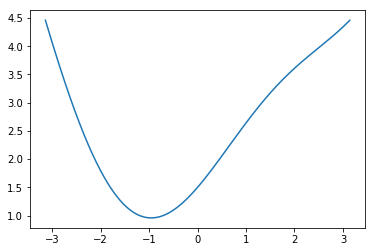

In [39]:
with tf.Session(graph=graph) as sess:
    plt.plot(t, sess.run(a, {x:t}))

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
graph = tf.Graph()
with graph.as_default():
    x = tf.placeholder(tf.float32)
    f = 1.5 + 0.3 * tf.pow(x, 2) + tf.sin(x)
    relu = tf.maximum(x, 0)
    tanh = (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))
    sigmoid = 1 / (1 + tf.exp(-x))

In [58]:
line = np.linspace(-np.pi, np.pi, 1024)

In [60]:
with tf.Session(graph=graph) as sess:
    res = sess.run([f, relu, tanh, sigmoid], {x: line})

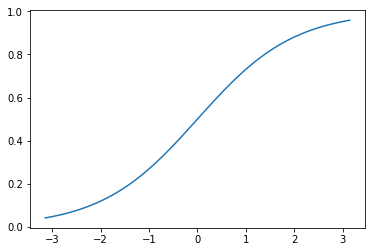

In [61]:
plt.plot(line, res[3])
plt.show()

### 练习4
计算 $f(x) = 1.5 + 0.3 * x^2 + sin(x)$ 的极小值。绘制梯度下降过程中$f(x)$值的变化

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/liuyanfang/anaconda3/envs/tensorflow1.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
graph = tf.Graph()
with graph.as_default():
    x = tf.Variable(3.1)
    # 定义计算公式
    f = 1.5 + 0.3 * tf.pow(x, 2) + tf.sin(x)
    # 定义梯度下降步骤
    opt = tf.train.GradientDescentOptimizer(0.1).minimize(f)

x: -0.9582517147064209, f(x): 0.9572862982749939


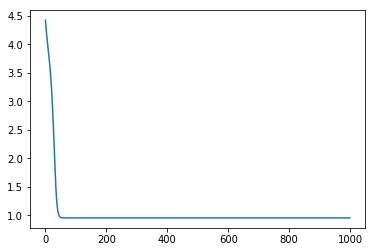

In [3]:
l = []
with tf.Session(graph=graph) as sess:
    # 初始化变量
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(1000):
        # 进行梯度下降
        t, _ = sess.run([f, opt])
        l.append(t)
    print('x: {}, f(x): {}'.format(sess.run(x), sess.run(f)))
# line = np.linspace(-np.pi, np.pi, 512)
plt.plot(l)
plt.show()